<a href="https://colab.research.google.com/github/Shanu-Mathew/Tensorflow-Notes/blob/main/Transfer_Learning_with_TF_(Fine_Tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Helper Functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-16 15:07:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-16 15:07:34 (91.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Import the helper functions
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

## Data Ingestion


In [ ]:
# Getting 10% of training data out of 10 classes of Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-10-16 15:07:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.7MB/s    in 8.5s    

2023-10-16 15:07:46 (18.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
# Create Training and Test Dir paths
train_dir= "10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE= 32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Check Batch of Data
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[5.58673477e+00 5.58673477e+00 3.58673477e+00]
   [5.35714293e+00 5.35714293e+00 3.35714293e+00]
   [6.49489784e+00 6.49489784e+00 4.49489784e+00]
   ...
   [1.51147903e+02 1.28086685e+02 1.20142876e+02]
   [1.49959183e+02 1.29765335e+02 1.24362259e+02]
   [1.49510147e+02 1.31096909e+02 1.27096909e+02]]

  [[5.00000000e+00 5.00000000e+00 3.00000000e+00]
   [4.13775444e+00 4.13775444e+00 2.13775468e+00]
   [5.07142830e+00 5.07142830e+00 3.07142830e+00]
   ...
   [1.55443924e+02 1.30903168e+02 1.20816452e+02]
   [1.57428528e+02 1.34846924e+02 1.28709152e+02]
   [1.48311096e+02 1.28117279e+02 1.22714180e+02]]

  [[6.21428585e+00 6.21428585e+00 4.21428585e+00]
   [5.27040815e+00 5.27040815e+00 3.27040815e+00]
   [5.00000000e+00 5.00000000e+00 3.00000000e+00]
   ...
   [1.53831696e+02 1.26617432e+02 1.15403168e+02]
   [1.55698959e+02 1.31056137e+02 1.23341835e+02]
   [1.54010147e+02 1.31852066e+02 1.25142853e+02]]

  ...

  [[1.12285713e+02 4.04999771e+01 1.48571863e+01]
   [1

## Building a Keras Functional API Model

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated)
base_model.trainable= False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# 4. If using ResNet50v2, You will need to normalize inputs
# x= tf.keras.layers.experimental.preprocessing.Rescaling(1./255) (inputs)

# 5.  Passing the inputs to the model
x=base_model(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggreegate all the most important information)
x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D:{x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="ouput_layer")(x)


# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_feature_extraction")])

24274472/24274472 [==============================] - 2s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231016-150758
Epoch 1/5
24/24 [==============================] - 22s 265ms/step - loss: 1.9348 - accuracy: 0.3907 - val_loss: 1.3250 - val_accuracy: 0.7368
Epoch 2/5
24/24 [==============================] - 3s 130ms/step - loss: 1.1694 - accuracy: 0.7560 - val_loss: 0.9038 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - 7s 285ms/step - loss: 0.8401 - accuracy: 0.8373 - val_loss: 0.7148 - val_accuracy: 0.8602
Epoch 4/5
24/24 [==============================] - 4s 133ms/step - loss: 0.6995 - accuracy: 0.8493 - val_loss: 0.6028 - val_accuracy: 0.8701
Epoch 5/5
24/24 [==============================] - 4s 173ms/step - loss: 0.6058 - accuracy: 0.8613 - val_loss: 0.5589 - val_accuracy: 0.8734


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.5716 - accuracy: 0.8604


[0.5716143846511841, 0.8604000210762024]

In [ ]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 ouput_layer (Dense)         (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

## Running a series of transfer learning experiments
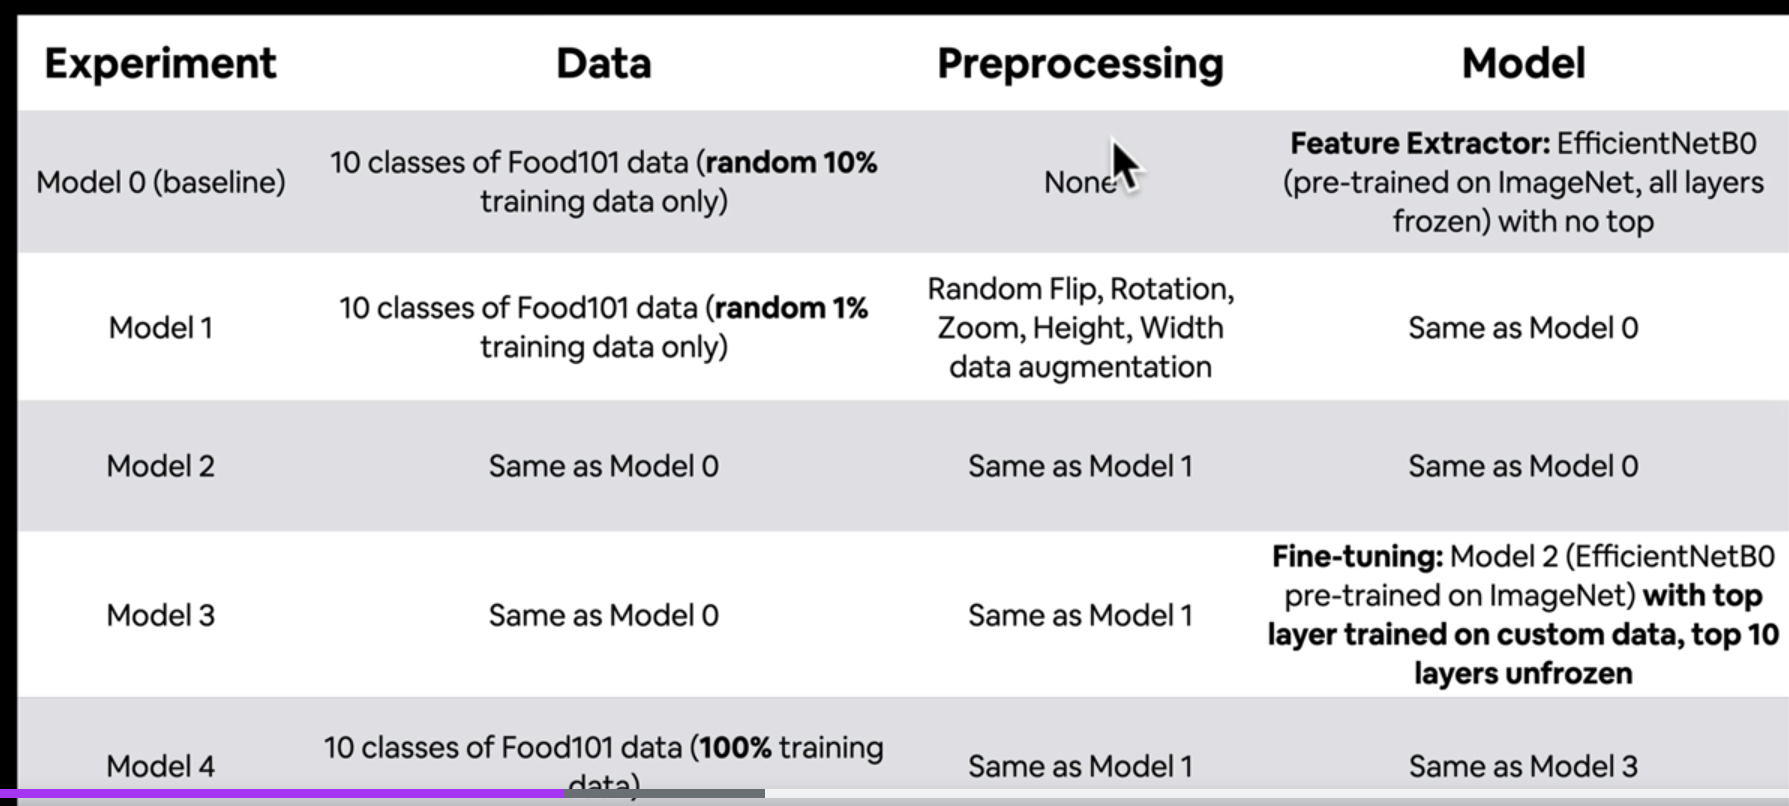

### Getting and Preprocessing Data for Model_1

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data('10_food_classes_1_percent.zip')

--2023-10-16 15:08:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  22.2MB/s    in 6.9s    

2023-10-16 15:08:56 (18.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There a

In [ ]:
# Setup Data Loaders

IMG_SIZE= (224,224)
BATCH_SIZE=32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE,
                                                               batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data Augmentation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Adding data augmentation right into the model
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./255)
],name="data_augmentation")

10_food_classes_1_percent/train/ramen


Text(0.5, 1.0, 'Augmented Image: ramen')

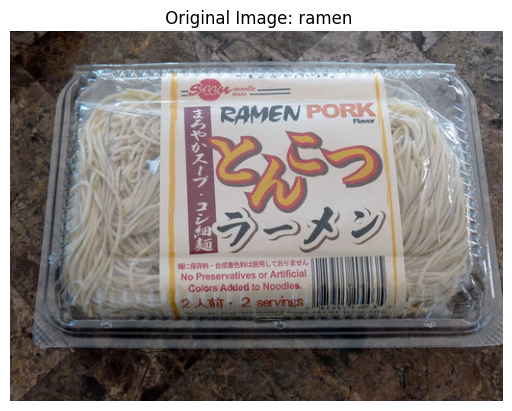

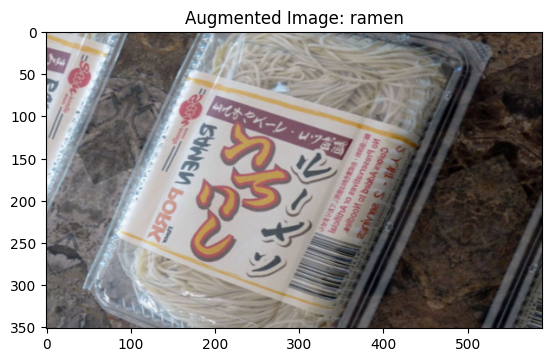

In [ ]:
### Visualizing Data Augmentation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class= random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"+ target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+ random_image

# Read the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f" Original Image: {target_class}")
plt.axis(False)
print(target_dir)


# Augmented Image
augmented_img= data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented Image: {target_class}")

### Model 1: Feature Extraction transfer learnign on 1% data with Data Augmentation

In [ ]:
input_shape =( 224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable= False


# Create input layer
inputs = layers.Input (shape=input_shape, name= "input_layer")

# Add in data augmentation Sequential model as a layer
x= data_augmentation(inputs)

# Give Base_model the inputs
x=base_model(x,training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D() (x)


# Put a dense layer on as the output
outputs= layers.Dense(10,activation="softmax",name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = keras.Model(inputs,outputs)


# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

# Fit the model
history_1_percent= model_1.fit(train_data_1_percent,
                               epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aig")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aig/20231016-150902
Epoch 1/5
3/3 [==============================] - 15s 3s/step - loss: 2.3767 - accuracy: 0.0714 - val_loss: 2.2159 - val_accuracy: 0.2023
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1497 - accuracy: 0.2429 - val_loss: 2.0856 - val_accuracy: 0.2845
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9610 - accuracy: 0.4000 - val_loss: 1.9843 - val_accuracy: 0.3602
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.7918 - accuracy: 0.5429 - val_loss: 1.8706 - val_accuracy: 0.4474
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6735 - accuracy: 0.5571 - val_loss: 1.7829 - val_accuracy: 0.5066


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
# Evaluate the model
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 78ms/step - loss: 1.8076 - accuracy: 0.4608


[1.8076045513153076, 0.4607999920845032]

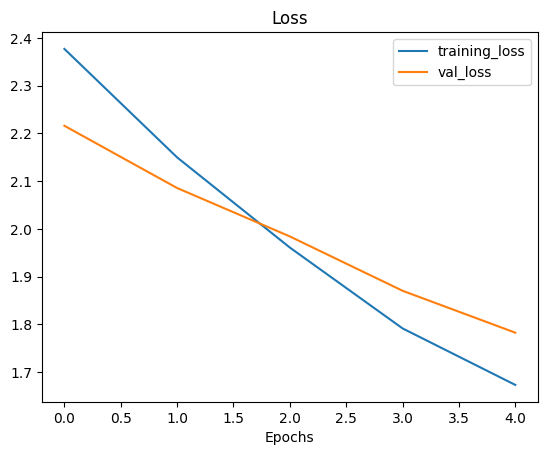

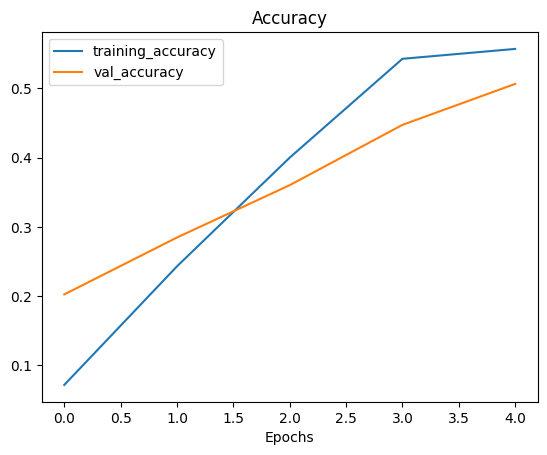

In [ ]:
# Plotting loss curves
plot_loss_curves(history_1_percent)

### Model 1: Feature Extraction transfer learning on 10% data with Data Augmentation

In [ ]:
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir= "/content/10_food_classes_10_percent/test"

In [ ]:
# Set Data Inputs
IMG_SIZE= (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Data Augmentation Layer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Adding data augmentation right into the model
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
    # preprocessing.Rescale(1./255)
],name="data_augmentation")

In [ ]:
input_shape =( 224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable= False


# Create input layer
inputs = layers.Input (shape=input_shape, name= "input_layer")

# Add in data augmentation Sequential model as a layer
x= data_augmentation(inputs)

# Give Base_model the inputs
x=base_model(x,training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D() (x)


# Put a dense layer on as the output
outputs= layers.Dense(10,activation="softmax",name="output_layer")(x)

# Make a model using the inputs and outputs
model_2 = keras.Model(inputs,outputs)


# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])


### Creating a ModelCheckpoint Callback



In [ ]:
# Set checkpoint path
checkpoint_path= "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

### Fit Model-2 passing in the ModelCheckpoint Callbacks

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5

# Fit the model
history_10_percent_data_aug= model_2.fit(train_data_10_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25 * len(test_data)),
                               callbacks=[checkpoint_callback,create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231016-150948
Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 2.3408 - accuracy: 0.1000
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 14s 2s/step - loss: 2.3408 - accuracy: 0.1000 - val_loss: 2.2344 - val_accuracy: 0.1891
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 2.0757 - accuracy: 0.2571
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 6s 2s/step - loss: 2.0757 - accuracy: 0.2571 - val_loss: 2.1036 - val_accuracy: 0.2911
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 1.9413 - accuracy: 0.4000
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 5s 2s/step - loss: 1.9413 - accuracy: 0.4000 - val_loss: 2.0055 - val_accuracy: 0.3355
Epoch 4/5
3/3 [=========

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 64ms/step - loss: 1.8407 - accuracy: 0.4116


[1.8407187461853027, 0.4115999937057495]

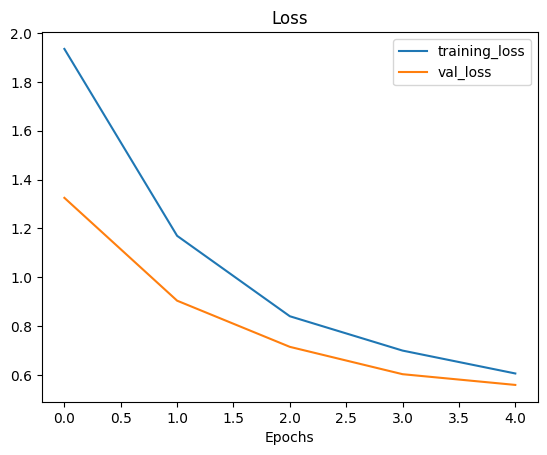

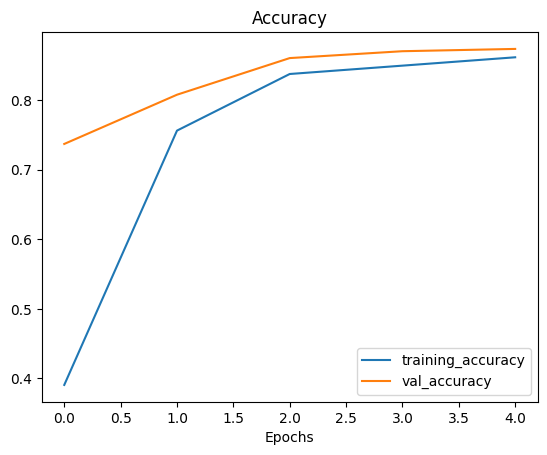

In [ ]:
plot_loss_curves(history_10_percent)

### Loading in Checkpointed Weights

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluate model_2 with loaded weights
loaded_weights_model_results= model_2.evaluate(test_data)
loaded_weights_model_results

79/79 [==============================] - 6s 63ms/step - loss: 1.8407 - accuracy: 0.4116


[1.8407179117202759, 0.4115999937057495]

### Model -3 Finetuned Model

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e28069fdc90> True
<keras.src.engine.sequential.Sequential object at 0x7e28069fded0> True
<keras.src.engine.functional.Functional object at 0x7e2806617730> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7e28065db610> True
<keras.src.layers.core.dense.Dense object at 0x7e2806639d20> True


In [ ]:
for layer in model_2.layers[2].layers:
  print(layer,layer.name, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e28069fea40> input_3 False
<keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7e28069ffc10> rescaling_2 False
<keras.src.layers.preprocessing.normalization.Normalization object at 0x7e28069fc310> normalization_2 False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e28069fc940> stem_conv False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7e280c284d00> stem_bn False
<keras.src.layers.core.activation.Activation object at 0x7e28a939afb0> stem_activation False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e28a987a260> block1a_project_conv False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7e2806a101f0> block1a_project_bn False
<keras.src.layers.core.activation.Activation object at 0x7e28a987aa10> block1a_project_activation False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e2806a11120> block2a_expand_c

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

# Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics= ["accuracy"])

In [ ]:
for layer in model_2.layers[2].layers:
  print(layer,layer.name, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e28069fea40> input_3 False
<keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7e28069ffc10> rescaling_2 False
<keras.src.layers.preprocessing.normalization.Normalization object at 0x7e28069fc310> normalization_2 False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e28069fc940> stem_conv False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7e280c284d00> stem_bn False
<keras.src.layers.core.activation.Activation object at 0x7e28a939afb0> stem_activation False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e28a987a260> block1a_project_conv False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7e2806a101f0> block1a_project_bn False
<keras.src.layers.core.activation.Activation object at 0x7e28a987aa10> block1a_project_activation False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e2806a11120> block2a_expand_c

In [ ]:
print(len(model_2.layers[2].trainable_variables))

10


In [ ]:
# Fine-tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug= model_2.fit(train_data_10_percent,
                               epochs=fine_tune_epochs,
                               validation_data=test_data,
                               validation_steps=int(0.25 * len(test_data)),
                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                               callbacks=[create_tensorboard_callback
                                (dir_name="transfer_learning",experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231016-151055
Epoch 5/10
3/3 [==============================] - 17s 3s/step - loss: 1.5007 - accuracy: 0.7429 - val_loss: 1.7565 - val_accuracy: 0.4441
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 1.3834 - accuracy: 0.8000 - val_loss: 1.6876 - val_accuracy: 0.4770
Epoch 7/10
3/3 [==============================] - 4s 2s/step - loss: 1.3668 - accuracy: 0.7714 - val_loss: 1.6436 - val_accuracy: 0.4918
Epoch 8/10
3/3 [==============================] - 3s 1s/step - loss: 1.2582 - accuracy: 0.8143 - val_loss: 1.5785 - val_accuracy: 0.5230
Epoch 9/10
3/3 [==============================] - 4s 1s/step - loss: 1.2609 - accuracy: 0.8000 - val_loss: 1.5183 - val_accuracy: 0.5543
Epoch 10/10
3/3 [==============================] - 4s 2s/step - loss: 1.2151 - accuracy: 0.7571 - val_loss: 1.4935 - val_accuracy: 0.5477


In [ ]:
# Evaluating Model
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 1.5036 - accuracy: 0.5660


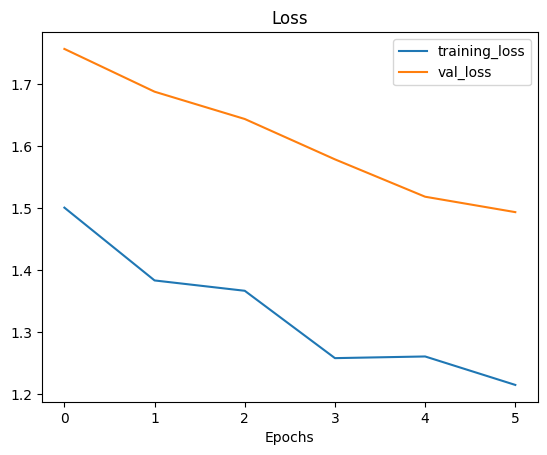

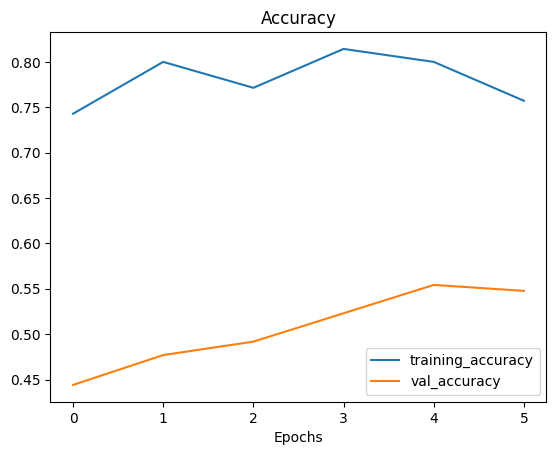

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
# Function to create a function to compare histories
def compare_historys(original_history,new_history,initial_epochs=5):
  """
  Compares two Tensorflow History Objects
  """
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history
  total_acc=acc+new_history.history["accuracy"]
  total_loss = loss+new_history.history["loss"]

  total_val_acc = val_acc+new_history.history["val_accuracy"]
  total_val_loss = val_loss+new_history.history["val_loss"]

  # Make Plots
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Val Accuracy")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.title("Training and Validation Accuracy")
  plt.legend()

  # Make Plots
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training Loss")
  plt.plot(total_val_loss,label="Val Loss")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.title("Training and Validation Loss")
  plt.legend()

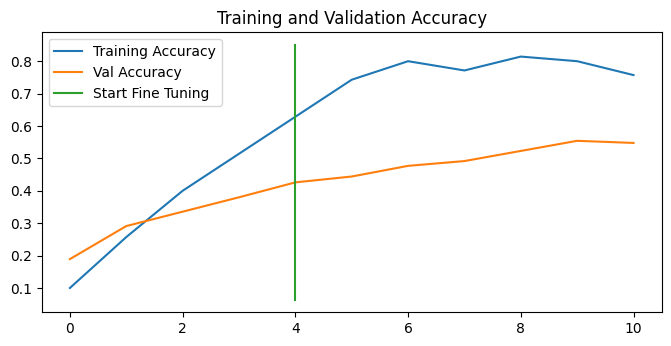

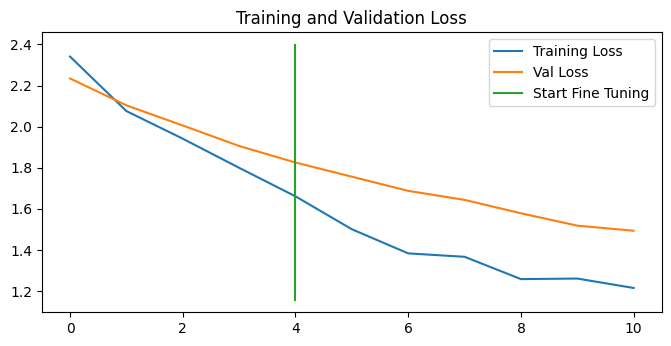

In [ ]:
compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug,
                 initial_epochs=5)

### Model 4: Fine-Tuning and Existing Model on all of the data

In [ ]:
# Download and unzip 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-10-16 15:11:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.6MB/s    in 24s     

2023-10-16 15:12:08 (20.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Setup training and test dir
train_dir_all_data= "10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"

In [ ]:
# No. of Images
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [ ]:

IMG_SIZE= (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Evaluate model 2 (this is the fine-tuned on 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 5s 64ms/step - loss: 1.5036 - accuracy: 0.5660


[1.5036309957504272, 0.5659999847412109]

In [ ]:
results_fine_tune_10_percent

[1.5036311149597168, 0.5659999847412109]

To train a fine-tuning model (model_4) we need to revert model_2 back to its feature extraction weights.

In [ ]:
# Load weights from checkpoint
model_2.load_weights(checkpoint_path)

ValueError: ignored

In [ ]:
model_2.evaluate(test_data)

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)

In [ ]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics= ["accuracy"])

In [ ]:
# Continue to train and fine-tune the mdoel to our data
# Fine-tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_classes_full= model_2.fit(train_data_10_classes_full,
                               epochs=fine_tune_epochs,
                               validation_data=test_data,
                               validation_steps=int(0.25 * len(test_data)),
                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                               callbacks=[create_tensorboard_callback
                                (dir_name="transfer_learning",experiment_name="full_10_classes_fine_tune_last_10")])


In [ ]:
# Let's evaluate on all of the test data
results_fine_tune_full_data= model_2.evaluate(test_data)
results_fine_tune_full_data

In [ ]:
compare_historys(history_10_percent_data_aug,
                 history_fine_10_classes_full,
                 initial_epochs=5)